In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [6]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Nerealnaya lyubov,2014,Russia,2014-02-13


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

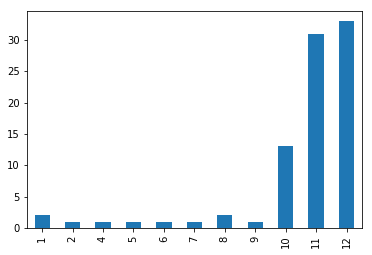

In [8]:
rd = release_dates
rd = rd[rd.title.str.contains('Christmas')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind = 'bar')


### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

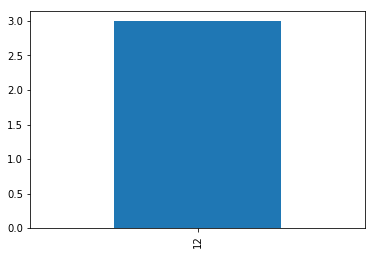

In [9]:
rd = release_dates
rd = rd[rd.title.str.startswith('The Hobbit')]
rd = rd[rd.country == 'USA']
rd.date.dt.month.value_counts().sort_index().plot(kind = 'bar')


### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

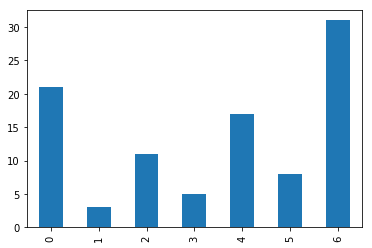

In [10]:
rd = release_dates
rd = rd[rd.title.str.contains('Romance')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')


### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

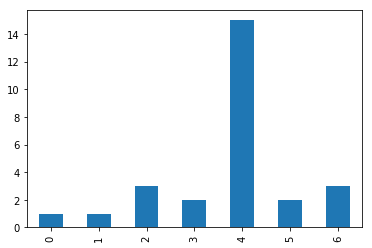

In [11]:
rd = release_dates
rd = rd[rd.title.str.contains('Action')]
rd = rd[rd.country == 'USA']
rd.date.dt.dayofweek.value_counts().sort_index().plot(kind = 'bar')


### On which date was each Judi Dench movie from the 1990s released in the USA?

In [13]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort_values(by=('date'))

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-07-18
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

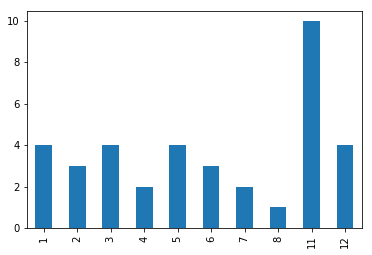

In [14]:
c = cast
c = c[c.name == 'Judi Dench']
m = c.merge(usa).sort_values(by=('date'))
m.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

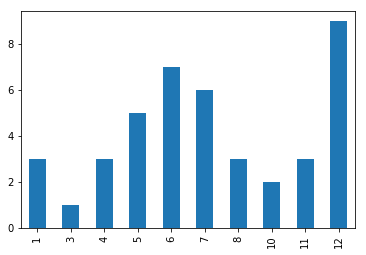

In [16]:
c = cast
c = c[c.name == 'Tom Cruise']
m = c.merge(usa).sort_values(by=('date'))
m.date.dt.month.value_counts().sort_index().plot(kind='bar')